# 쏘카 데이터를 이용한 보험사기 탐지 프로젝트

## 3. 모델 테스트(최적의 파라미터 도출) 및 최종 모델 선정

### 3.1 쏘카 데이터 불러오기

In [1]:
import pandas as pd

socar_dataset = pd.read_csv('insurance_fraud_detect_data.csv')
pd.options.display.max_columns = len(socar_dataset.columns)
pd.options.display.float_format = '{:.5f}'.format

In [2]:
socar_dataset.columns = ['label', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                    's15','s16','s17','s18', 's19', 's20','s21', 's22', 's23','s24'  ]

In [3]:
socar_dataset

,label,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24
0,0,2,1,3,0,2,0,100,2,0,0,4,2,4,130254.67800,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,0,1,4,4,0.00000,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,0,1,4,6,258130.57980,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,0,3,3,5,1341009.16300,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,0,1,1,1,524030.56960,1209410,1,0,0,2,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,0,1,1,1,0.00000,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,0,5,2,6,618439.44180,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,3,5,0.00000,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,0,6,1,2,0.00000,0,4,1,0,1,0,0,0,-1,0


### 3.2 데이터 전처리 (Preprocessing)

In [4]:
socar_dataset['s21_22'] = ''

In [5]:
for i, j in socar_dataset.iterrows():
    if (j['s21'] == 0) & (j['s22'] == 0):
        socar_dataset.loc[i, 's21_22'] = 0
    if (j['s21'] == 1) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 1
    if (j['s21'] == 2) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 2
    if (j['s21'] == 0) & (j['s22'] == 1):
        socar_dataset.loc[i, 's21_22'] = 3
    if (j['s21'] == 1) & (j['s22'] == 0):
        socar_dataset.loc[i, 's21_22'] = 4
    else:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182


3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919


5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692


7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407


8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145


10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
1066

12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
1227

13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
1364

15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
1525

In [6]:
socar_dataset['s21_22'].value_counts()

0    11324
1     3595
2     1077
4        3
3        1
Name: s21_22, dtype: int64

In [7]:
socar_dataset

,label,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s21_22
0,0,2,1,3,0,2,0,100,2,0,0,4,...,130254.67800,0,1,0,0,1,0,0,0,-1,0,0
1,0,1,0,4,0,4,0,0,3,1,0,1,...,0.00000,0,1,1,1,2,1,1,1,0,1,1
2,0,1,0,4,1,4,0,100,3,1,0,1,...,258130.57980,12925040,3,1,0,2,1,1,1,0,1,1
3,0,3,1,3,0,4,0,0,2,0,0,3,...,1341009.16300,0,3,1,0,1,0,0,0,-1,0,0
4,0,1,0,1,0,1,0,100,1,0,0,1,...,524030.56960,1209410,1,0,0,2,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,0,100,2,0,0,1,...,0.00000,0,1,1,0,1,0,0,0,-1,0,0
15996,0,2,0,2,1,4,0,100,1,1,0,5,...,618439.44180,0,2,1,0,1,0,0,0,-1,0,0
15997,0,2,1,2,0,4,0,100,1,0,0,1,...,0.00000,0,0,0,0,1,0,0,0,-1,1,0
15998,0,2,0,2,0,2,0,100,2,0,0,6,...,0.00000,0,4,1,0,1,0,0,0,-1,0,0


### 3.2.2 보험사기 사고 판단에 불필요한 컬럼 제거

In [8]:
socar_dataset = socar_dataset.drop(['s6','s22','s21','s14', 's17', 's18', 's19', 's23'],axis=1)
socar_dataset

,label,s1,s2,s3,s4,s5,s7,s8,s9,s10,s11,s12,s13,s15,s16,s20,s24,s21_22
0,0,2,1,3,0,2,100,2,0,0,4,2,4,0,1,0,0,0
1,0,1,0,4,0,4,0,3,1,0,1,4,4,0,1,1,1,1
2,0,1,0,4,1,4,100,3,1,0,1,4,6,12925040,3,1,1,1
3,0,3,1,3,0,4,0,2,0,0,3,3,5,0,3,0,0,0
4,0,1,0,1,0,1,100,1,0,0,1,1,1,1209410,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,2,0,2,0,2,100,2,0,0,1,1,1,0,1,0,0,0
15996,0,2,0,2,1,4,100,1,1,0,5,2,6,0,2,0,0,0
15997,0,2,1,2,0,4,100,1,0,0,1,3,5,0,0,0,1,0
15998,0,2,0,2,0,2,100,2,0,0,6,1,2,0,4,0,0,0


### 3.2.3 noise로 판단된 데이터 제거

In [9]:
# noise : fraud에는 없고, non-fraud에만 있는 데이터

socar_dataset = socar_dataset[socar_dataset['s13'] > 0]

socar_dataset = socar_dataset[socar_dataset['s12'] < 5]  

socar_dataset = socar_dataset[socar_dataset['s20'] < 3] 

### 3.2.3 연속형 데이터를 명목형 데이터로 변경

In [10]:
socar_dataset.loc[socar_dataset['s3']<3, 's3'] = 0
socar_dataset.loc[socar_dataset['s3']>=3, 's3'] = 1

In [11]:
socar_dataset.loc[socar_dataset['s7'] < 100, 's7'] = 0
socar_dataset.loc[socar_dataset['s7']==100, 's7'] = 1

In [12]:
socar_dataset.loc[socar_dataset['s11'] == 1, 's11'] = 0
socar_dataset.loc[socar_dataset['s11'] == 3, 's11'] = 0
socar_dataset.loc[socar_dataset['s11'] == 2, 's11'] = 1
socar_dataset.loc[socar_dataset['s11'] >= 4, 's11'] = 1

In [13]:
socar_dataset.loc[socar_dataset['s13'] == 1, 's13'] = 0
socar_dataset.loc[socar_dataset['s13'] == 3, 's13'] = 0
socar_dataset.loc[socar_dataset['s13'] == 2, 's13'] = 1
socar_dataset.loc[socar_dataset['s13'] >= 4, 's13'] = 1

In [14]:
# 전체 데이터 정렬
socar_dataset.reset_index(drop=True, inplace=True)

In [15]:
socar_dataset

,label,s1,s2,s3,s4,s5,s7,s8,s9,s10,s11,s12,s13,s15,s16,s20,s24,s21_22
0,0,2,1,1,0,2,1,2,0,0,1,2,1,0,1,0,0,0
1,0,1,0,1,0,4,0,3,1,0,0,4,1,0,1,1,1,1
2,0,1,0,1,1,4,1,3,1,0,0,4,1,12925040,3,1,1,1
3,0,3,1,1,0,4,0,2,0,0,0,3,1,0,3,0,0,0
4,0,1,0,0,0,1,1,1,0,0,0,1,0,1209410,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,2,0,1,1,4,1,1,0,0,1,1,1,0,0,0,0,0
15333,0,2,0,0,0,2,1,2,0,0,0,1,0,0,1,0,0,0
15334,0,2,0,0,1,4,1,1,1,0,1,2,1,0,2,0,0,0
15335,0,2,1,0,0,4,1,1,0,0,0,3,1,0,0,0,1,0


### 3.2.4 나머지 연속형 데이터 OneHotEncoding

In [16]:
socar_dataset['s5'].value_counts()

4    4848
2    4657
1    3616
3    2216
Name: s5, dtype: int64

In [17]:
pd.get_dummies(socar_dataset['s5'])

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
15332,0,0,0,1
15333,0,1,0,0
15334,0,0,0,1
15335,0,0,0,1


In [18]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s5'])

In [19]:
socar_dataset = socar_dataset.rename({'s5_1':'s5_1'},axis='columns')
socar_dataset = socar_dataset.rename({'s5_2':'s5_2'},axis='columns')
socar_dataset = socar_dataset.rename({'s5_3':'s5_3'},axis='columns')
socar_dataset = socar_dataset.rename({'s5_4':'s5_4'},axis='columns')

In [20]:
socar_dataset['s8'].value_counts()

1    6749
2    5626
3    2962
Name: s8, dtype: int64

In [21]:
pd.get_dummies(socar_dataset['s8'])

,1,2,3
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
15332,1,0,0
15333,0,1,0
15334,1,0,0
15335,1,0,0


In [22]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s8'])

In [23]:
socar_dataset['s12'].value_counts()

1    5698
3    4834
2    3217
4    1588
Name: s12, dtype: int64

In [24]:
pd.get_dummies(socar_dataset['s12'])

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
15332,1,0,0,0
15333,1,0,0,0
15334,0,1,0,0
15335,0,0,1,0


In [25]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s12'])

In [26]:
socar_dataset['s16'].value_counts()

1    6627
0    4634
2    1650
4    1593
3     584
5     249
Name: s16, dtype: int64

In [27]:
socar_dataset.loc[socar_dataset['s16'] == 4, 's16'] = 0

In [28]:
socar_dataset['s16'].value_counts()

1    6627
0    6227
2    1650
3     584
5     249
Name: s16, dtype: int64

In [29]:
len(socar_dataset)

15337

In [30]:
socar_dataset = socar_dataset[socar_dataset['s16'] < 3]

In [31]:
socar_dataset['s16'].value_counts()

1    6627
0    6227
2    1650
Name: s16, dtype: int64

In [32]:
pd.get_dummies(socar_dataset['s16'])

,0,1,2
0,0,1,0
1,0,1,0
4,0,1,0
5,0,1,0
6,1,0,0
...,...,...,...
15332,1,0,0
15333,0,1,0
15334,0,0,1
15335,1,0,0


In [33]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s16'])

In [34]:
socar_dataset = socar_dataset.rename({'s16_0':'acc_loc0'},axis='columns')
socar_dataset = socar_dataset.rename({'s16_1':'acc_loc1'},axis='columns')
socar_dataset = socar_dataset.rename({'s16_2':'acc_loc2'},axis='columns')

In [35]:
socar_dataset['s1'].value_counts()

2    7567
1    6031
3     497
5     293
4     116
Name: s1, dtype: int64

In [36]:
socar_dataset = socar_dataset[socar_dataset['s1'] <= 3]

In [37]:
pd.get_dummies(socar_dataset['s1'])

,1,2,3
0,0,1,0
1,1,0,0
4,1,0,0
5,0,1,0
6,1,0,0
...,...,...,...
15332,0,1,0
15333,0,1,0
15334,0,1,0
15335,0,1,0


In [38]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s1'])

In [39]:
socar_dataset['s15'] = socar_dataset['s15'].astype('int')
for i, j in socar_dataset.iterrows():
    if j['s15'] == 0:
        socar_dataset.loc[i, 's15'] = 1
        
    if (j['s15'] > 0) & (j['s15'] < 1250000):
        socar_dataset.loc[i, 's15'] = 2
    
    if j['s15'] >= 1250000:
        socar_dataset.loc[i, 's15'] = 3
        
    else:
        print(i)

0
1
4
6
7
8
9
10
11
12
13
14
16
17
18
19
20
21
23
24
25
27
28
29
30
32
33
34
35
36
37
38
41
42
43
44
46
47
48
49
52
54
57
59
60
61
62
63
65
66
67
70
72
73
74
75
76
77
79
80
82
84
85
86
87
88
89
90
91
92
93
94
95
96
97
99
101
102
103
104
105
106
107
108
109
110
111
112
113
117
121
122
123
124
125
126
127
128
130
131
132
134
135
136
137
138
139
140
141
142
144
146
147
149
150
151
152
153
155
156
157
158
159
161
162
163
164
165
169
171
174
175
176
178
179
180
181
182
183
184
185
186
187
188
190
191
192
193
194
195
197
198
199
201
202
203
204
205
206
207
208
209
210
211
212
213
214
217
219
221
222
224
225
226
227
228
229
230
232
233
234
235
236
238
239
240
241
243
244
246
247
248
250
251
252
256
257
258
259
261
262
263
264
269
270
271
272
273
274
275
276
277
278
279
280
281
283
284
285
286
287
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
307
309
310
311
312
313
314
315
316
317
318
319
321
322
323
324
325
327
328
329
330
332
334
335
337
338
339
342
344
346
347
348
349

2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2550
2551
2552
2553
2555
2556
2557
2558
2560
2561
2563
2565
2568
2569
2570
2571
2572
2573
2574
2575
2577
2578
2579
2581
2583
2585
2586
2587
2588
2589
2591
2592
2593
2594
2595
2598
2600
2601
2602
2603
2604
2605
2606
2607
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2621
2622
2623
2625
2626
2627
2628
2630
2631
2635
2636
2637
2638
2639
2640
2643
2646
2647
2649
2650
2651
2652
2653
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2670
2671
2673
2674
2676
2677
2678
2679
2680
2681
2682
2683
2685
2686
2687
2688
2689
2691
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2713
2714
2715
2716
2717
2718
2719
2720
2722
2723
2724
2725
2726
2727
2728
2729
2730
2732
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2748
2749
2750
2752
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2769
2770
2772
2776
2777
2778
2779
2780
2781
2784
2785


4789
4790
4792
4793
4794
4795
4797
4798
4802
4803
4804
4806
4807
4808
4809
4810
4811
4812
4815
4816
4817
4818
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4835
4836
4837
4839
4840
4841
4843
4844
4846
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864
4865
4866
4867
4868
4869
4870
4871
4872
4873
4874
4875
4877
4879
4880
4881
4882
4883
4884
4885
4886
4887
4888
4889
4890
4891
4892
4893
4894
4895
4896
4897
4898
4900
4901
4903
4904
4905
4906
4907
4909
4910
4912
4913
4916
4917
4918
4919
4923
4924
4926
4927
4928
4930
4932
4933
4934
4935
4936
4937
4938
4940
4941
4943
4944
4945
4951
4952
4953
4955
4956
4957
4958
4959
4960
4962
4963
4964
4965
4966
4967
4970
4971
4973
4974
4975
4977
4979
4980
4981
4982
4985
4986
4988
4989
4990
4991
4994
4995
4996
4997
4999
5000
5001
5002
5003
5005
5006
5007
5008
5009
5010
5011
5013
5014
5015
5016
5017
5018
5019
5020
5021
5024
5025
5026
5028
5029
5030
5031
5032
5034
5035
5036
5037
5038
5039
5041
5042
5043
5044
5045
5046


7027
7028
7029
7030
7032
7033
7034
7035
7036
7037
7039
7040
7041
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7060
7061
7062
7063
7064
7065
7066
7068
7069
7071
7072
7073
7077
7078
7079
7080
7082
7083
7085
7086
7087
7088
7089
7090
7091
7093
7094
7097
7099
7100
7101
7102
7104
7105
7106
7107
7109
7110
7111
7112
7113
7114
7115
7116
7117
7119
7120
7122
7124
7125
7126
7127
7129
7130
7131
7132
7134
7135
7137
7141
7142
7143
7144
7145
7147
7149
7150
7151
7152
7155
7156
7157
7158
7160
7161
7162
7164
7165
7166
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7179
7180
7181
7182
7183
7184
7186
7188
7191
7192
7193
7194
7195
7196
7197
7198
7200
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7215
7216
7217
7219
7220
7221
7222
7223
7224
7225
7226
7227
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7245
7246
7247
7248
7249
7250
7252
7253
7254
7255
7256
7257
7259
7260
7261
7263
7264
7265
7266
7268
7270
7271
7272
7273
7274
7275
7276
7277


9513
9514
9515
9516
9517
9521
9522
9523
9524
9530
9531
9532
9533
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9546
9547
9548
9549
9550
9552
9554
9555
9556
9558
9560
9561
9562
9563
9564
9565
9566
9567
9568
9570
9572
9573
9574
9576
9577
9578
9579
9580
9582
9584
9586
9587
9589
9590
9591
9592
9593
9594
9596
9597
9598
9599
9601
9602
9603
9604
9605
9606
9607
9609
9610
9612
9613
9614
9615
9618
9619
9621
9623
9624
9625
9627
9628
9631
9632
9633
9634
9635
9636
9637
9639
9640
9641
9642
9643
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9662
9663
9664
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9682
9683
9684
9685
9686
9687
9688
9689
9691
9692
9693
9694
9695
9696
9698
9701
9702
9703
9705
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9734
9736
9737
9738
9739
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9757
9760
9761
9762
9763
9766


11556
11557
11558
11559
11560
11562
11563
11564
11565
11566
11569
11571
11572
11573
11575
11576
11577
11578
11579
11580
11581
11582
11583
11585
11586
11587
11589
11590
11591
11595
11597
11598
11599
11600
11601
11602
11603
11606
11607
11608
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11623
11625
11627
11628
11630
11632
11633
11634
11636
11638
11639
11640
11641
11642
11643
11644
11646
11647
11648
11649
11650
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11665
11666
11667
11669
11670
11672
11673
11674
11675
11676
11678
11679
11682
11683
11685
11686
11687
11688
11689
11691
11692
11694
11695
11696
11698
11699
11700
11701
11703
11705
11706
11707
11708
11710
11711
11712
11713
11714
11715
11717
11718
11719
11721
11722
11723
11724
11725
11726
11727
11728
11729
11731
11732
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11748
11750
11751
11752
11753
11755
11756
11757
11759
11760
11761
11762
11763
11764
11765
1176

13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13666
13667
13669
13670
13672
13673
13675
13676
13677
13678
13679
13681
13683
13684
13685
13686
13687
13689
13690
13691
13692
13693
13694
13695
13696
13697
13699
13700
13701
13702
13703
13704
13705
13706
13707
13709
13710
13711
13713
13714
13716
13717
13718
13720
13721
13723
13724
13725
13726
13727
13728
13729
13730
13732
13733
13734
13735
13736
13738
13739
13740
13741
13742
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13784
13787
13788
13790
13791
13792
13793
13794
13795
13797
13798
13799
13800
13801
13802
13803
13805
13806
13807
13808
13809
13811
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13838
13839
13840
13841
13842
13843
13844
13846
13847
13848
13850
1385

In [40]:
socar_dataset['s15'].value_counts()

1    9148
2    2851
3    2096
Name: s15, dtype: int64

In [41]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s15'])

In [42]:
socar_dataset['s20'].value_counts()

0    10004
1     4035
2       56
Name: s20, dtype: int64

In [43]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s20'])

In [44]:
socar_dataset

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s21_22,s5_1,...,acc_loc0,acc_loc1,acc_loc2,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2
0,0,1,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1,0,0
5,0,1,1,0,1,0,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0,1,0
6,1,1,1,0,1,0,0,1,0,1,2,0,...,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,0,1,1,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0
15333,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1,0,0
15334,0,0,0,1,1,1,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1,0,0
15335,0,1,0,0,1,0,0,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,1,0,0


In [45]:
socar_dataset['s21_22'].value_counts()

0    9951
1    3193
2     947
4       3
3       1
Name: s21_22, dtype: int64

In [46]:
socar_dataset = pd.get_dummies(data=socar_dataset, columns=['s21_22'])

In [47]:
socar_dataset = socar_dataset.drop(['s21_22_3','s21_22_4'],axis=1)
socar_dataset

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s5_1,s5_2,...,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
0,0,1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1,0,0
5,0,1,1,0,1,0,1,1,1,1,1,0,...,0,1,0,0,0,1,0,1,0,0,1,0
6,1,1,1,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,0,0,1,1,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0
15333,0,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1,0,0
15334,0,0,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0
15335,0,1,0,0,1,0,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1,0,0


In [48]:
# 전체 데이터 정렬
socar_dataset.reset_index(drop=True, inplace=True)

In [49]:
# 데이터 전처리 후 상관관계 분석
socar_dataset.corr()

,label,s2,s3,s4,s7,s9,s10,s11,s13,s24,s5_1,s5_2,...,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
label,1.00000,-0.00250,0.00328,0.00291,0.01347,-0.00507,0.01292,-0.00930,-0.01548,-0.00320,0.01358,-0.01522,...,-0.00301,0.00141,0.00426,-0.01386,0.01630,0.00019,-0.01878,0.01637,0.01783,-0.02119,0.01255,0.01232
s2,-0.00250,1.00000,0.09742,0.00374,-0.00505,0.04923,-0.08603,-0.01066,0.05126,-0.05677,0.08322,-0.03381,...,-0.03307,-0.03816,0.19187,-0.00762,-0.00351,0.01418,0.00411,-0.00507,0.00675,0.00432,-0.00645,0.00257
s3,0.00328,0.09742,1.00000,0.01833,-0.05435,0.09946,-0.03896,0.03765,0.09851,0.01451,-0.06721,-0.05610,...,0.01455,-0.04282,0.07672,0.03163,-0.00910,-0.03216,-0.00988,0.01040,-0.00343,-0.01135,0.00345,0.01527
s4,0.00291,0.00374,0.01833,1.00000,-0.03005,0.15776,0.03103,-0.01699,-0.02055,0.07036,-0.13581,-0.07583,...,-0.01097,0.00789,0.00810,-0.02539,0.00272,0.03099,-0.06013,0.05798,0.01722,-0.06298,0.06042,0.01293
s7,0.01347,-0.00505,-0.05435,-0.03005,1.00000,-0.03990,0.01893,-0.00913,-0.05389,0.00028,0.06121,0.05012,...,-0.04008,0.04267,-0.00786,0.00014,0.06218,-0.07039,0.26312,-0.26542,0.00873,0.25975,-0.26647,-0.02760
s9,-0.00507,0.04923,0.09946,0.15776,-0.03990,1.00000,0.03482,-0.01231,0.00985,0.17207,-0.18564,-0.11528,...,0.00351,-0.01690,0.03627,0.00355,-0.00034,-0.00437,-0.12587,0.12508,0.00938,-0.12817,0.10481,0.05771
s10,0.01292,-0.08603,-0.03896,0.03103,0.01893,0.03482,1.00000,-0.00065,-0.01345,0.06684,-0.00333,0.02218,...,-0.09944,0.11945,-0.05618,-0.00466,0.00508,0.00052,-0.07294,0.07247,0.00549,-0.07469,0.07336,0.01258
s11,-0.00930,-0.01066,0.03765,-0.01699,-0.00913,-0.01231,-0.00065,1.00000,0.42139,0.02027,0.05776,0.02187,...,0.00904,0.00290,-0.03210,0.01562,0.00989,-0.03212,-0.01217,0.01213,0.00066,-0.01039,0.00311,0.01463
s13,-0.01548,0.05126,0.09851,-0.02055,-0.05389,0.00985,-0.01345,0.42139,1.00000,-0.01172,0.06119,0.01658,...,0.01705,-0.01526,-0.00447,-0.00070,0.01681,-0.01804,-0.02908,0.02740,0.01295,-0.02509,0.02487,0.00473
s24,-0.00320,-0.05677,0.01451,0.07036,0.00028,0.17207,0.06684,0.02027,-0.01172,1.00000,-0.03863,-0.00440,...,0.00187,0.00807,-0.02686,0.00526,-0.01512,0.01001,-0.19780,0.19553,0.02220,-0.19957,0.18715,0.04871


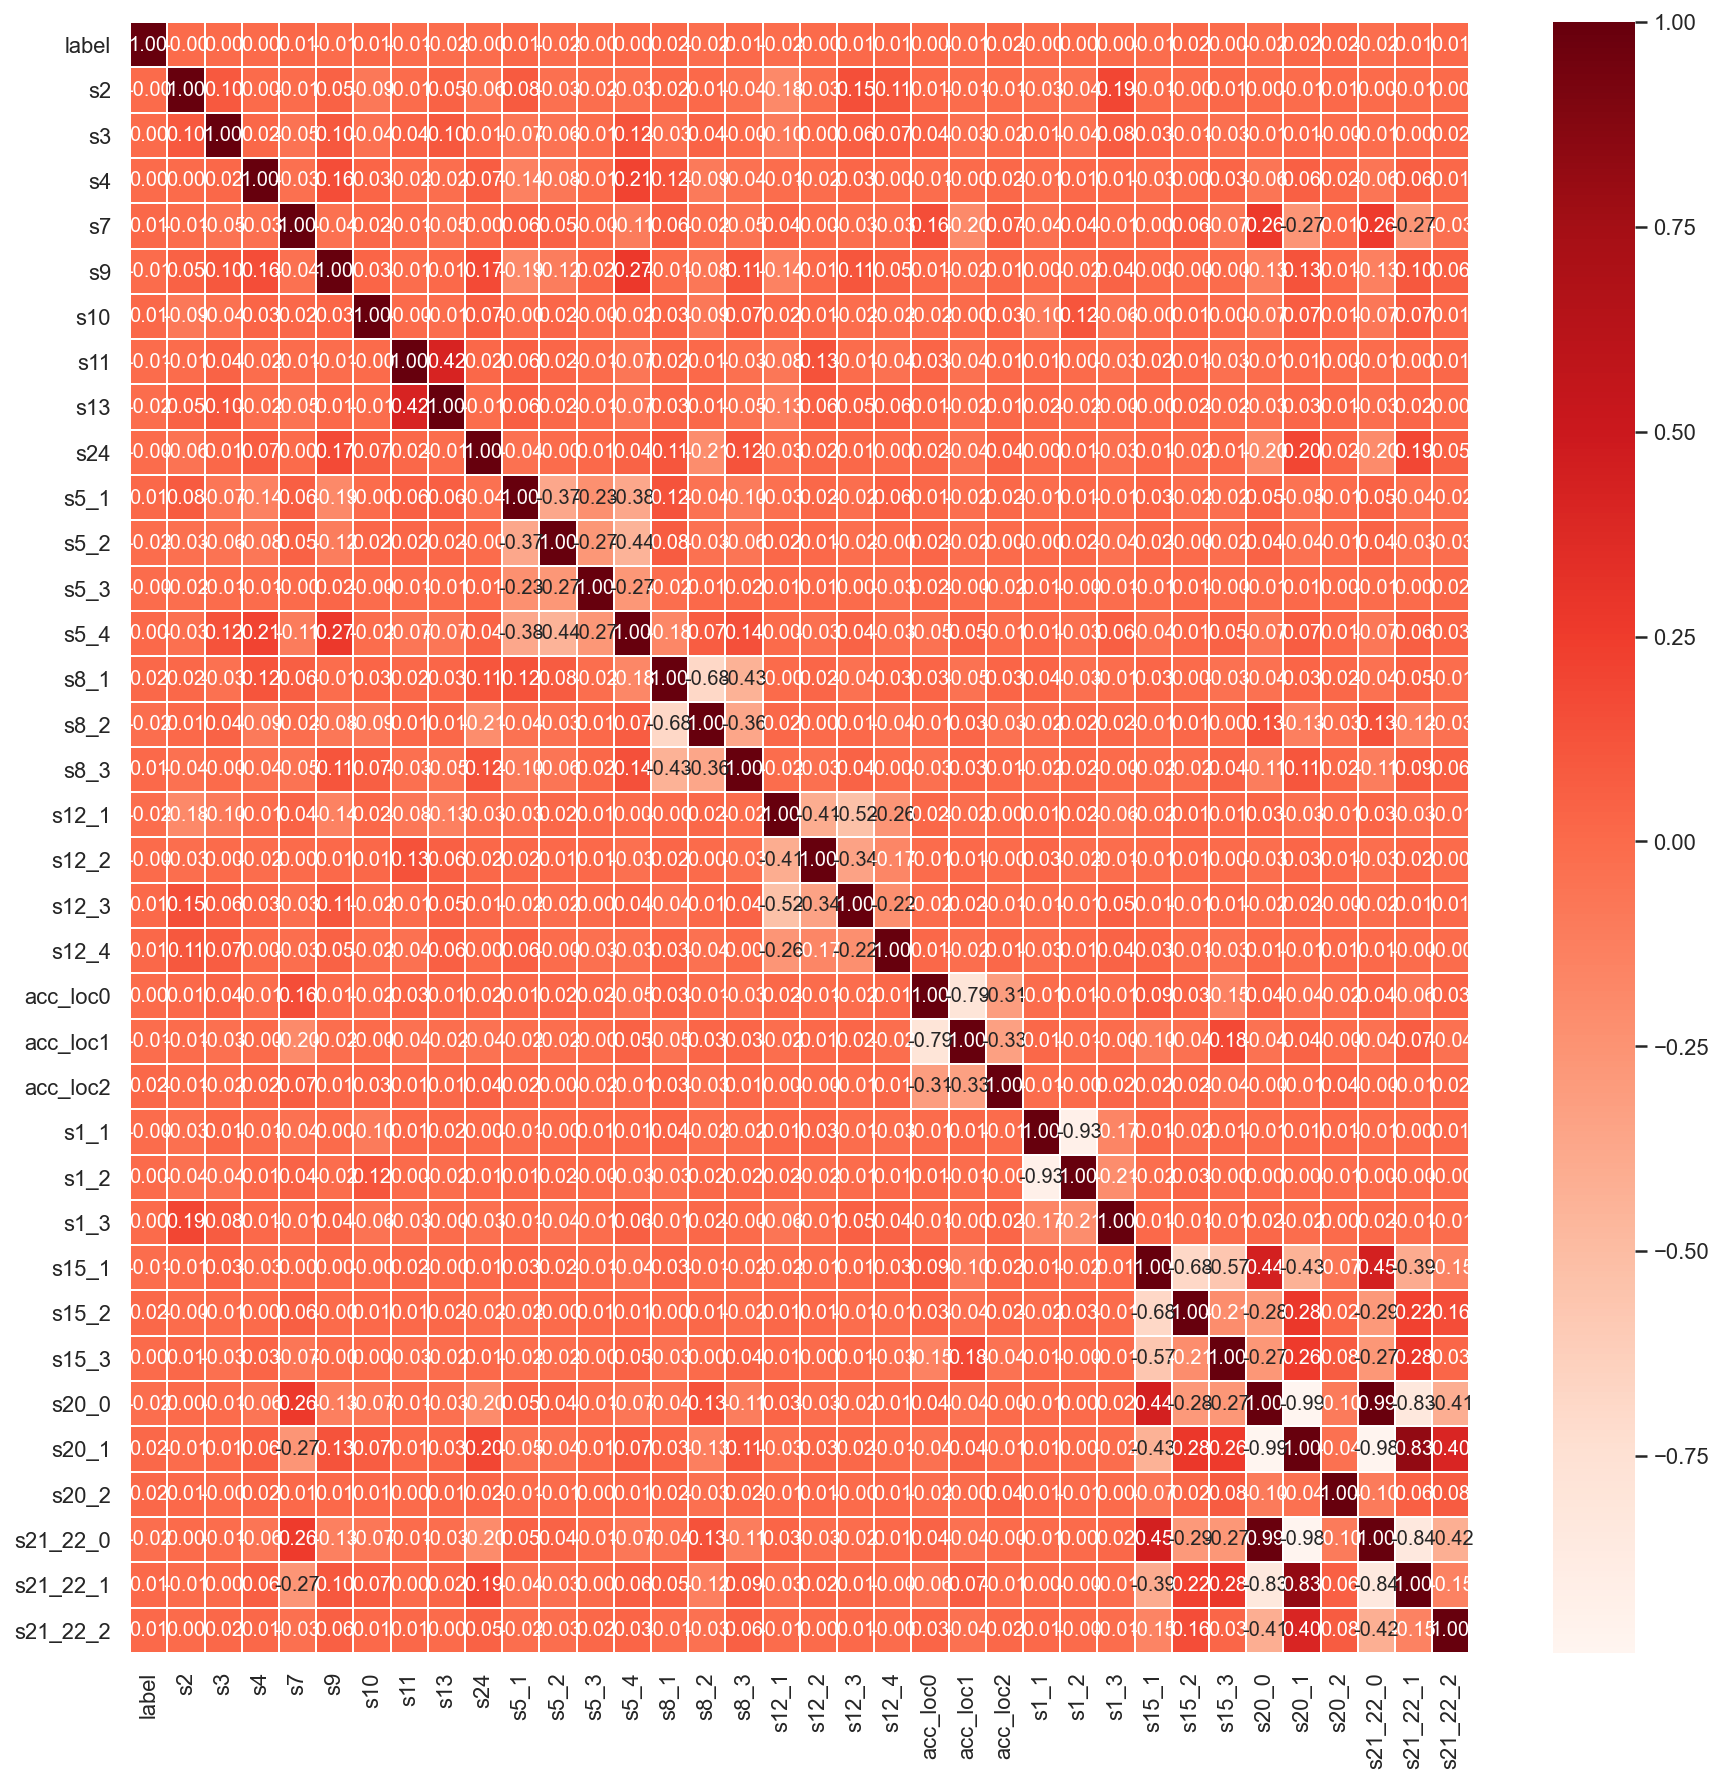

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15))
sns.heatmap(data = socar_dataset.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

### 3.3 모델 테스트(최적의 파라미터 도출) 및 최종 모델 선정

### 3.3.1 Train / Test 데이터 분리

In [51]:
train_data = socar_dataset[socar_dataset['s24']==0]
test_data = socar_dataset[socar_dataset['s24']==1]

### 3.3.2 non-fraud train 데이터 / fraud train 데이터 분리

In [52]:
nonfraud_train_data = train_data[train_data['label']==0]
fraud_train_data = train_data[train_data['label']==1]

### 3.3.3 non-fraud test 데이터 / fraud test 데이터 분리

In [53]:
nonfraud_test_data = test_data[test_data['label']==0]
fraud_test_data = test_data[test_data['label']==1]

### 3.3.4 feature / label 분리

In [54]:
X_train=train_data.iloc[0:,1:]
X_test=test_data.iloc[0:,1:]

y_train=train_data.iloc[0:,0]
y_test=test_data.iloc[0:,0]

In [55]:
pd.options.display.max_columns = len(socar_dataset.columns)

X_train.drop(['s24'], axis=1)
X_test.drop(['s24'], axis=1)

,s2,s3,s4,s7,s9,s10,s11,s13,s5_1,s5_2,s5_3,s5_4,s8_1,s8_2,s8_3,s12_1,s12_2,s12_3,s12_4,acc_loc0,acc_loc1,acc_loc2,s1_1,s1_2,s1_3,s15_1,s15_2,s15_3,s20_0,s20_1,s20_2,s21_22_0,s21_22_1,s21_22_2
1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
4,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
5,1,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
7,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14074,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
14079,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
14080,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
14088,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [56]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# mm = MinMaxScaler()
# ss = StandardScaler()

# X_train['s14'] = ss.fit_transform(X_train['s14'].values.reshape(-1,1))
# X_train['s15'] = ss.fit_transform(X_train['s15'].values.reshape(-1,1))

# X_test['s14'] = ss.transform(X_test['s14'].values.reshape(-1,1))
# X_test['s15'] = ss.transform(X_test['s15'].values.reshape(-1,1))

### 3.3.5 모델 평가 함수

In [57]:
# 분류기의 성능을 return하는 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re=recall_score(y_test, pred)
    f1= f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [58]:
# 모델 성능을 출력하는 함수
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('------confusion matrix')
    print(confusion)
    print('=======')
    
    print('Accuracy:{}, precision:{}'.format(acc, pre))
    print('recall"{}, F1:{}, AUC:{}'.format(re,f1,auc))

In [59]:
# 모델과 데이터를 주면 성능을 출력하는 함수
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [60]:
# 다수의 모델과 성능을 정리해서 DataFrame으로 반환하는 함수
def get_result_pd(models, models_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_acu']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

### 3.3.6 OverSampling - SMOTE

In [61]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=13, k_neighbors=10)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

### 3.3.7 Model Test - Decision Tree (SMOTE)

In [62]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)

dt_clf.fit(X_train_over, y_train_over)
dt_pred= dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2119  678]
 [   1    6]]
Accuracy:0.7578459343794579, precision:0.008771929824561403
recall"0.8571428571428571, F1:0.01736613603473227, AUC:0.8073701414781144


In [63]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9185 2073]
 [  13   20]]
Accuracy:0.815251084934904, precision:0.009555661729574774
recall"0.6060606060606061, F1:0.018814675446848544, AUC:0.7109624401772208


### 3.3.8 Model Test - Logistic Regression (SMOTE)

In [64]:
# y_test
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')

lr_clf.fit(X_train_over, y_train_over)
lr_pred= lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

------confusion matrix
[[2795    2]
 [   7    0]]
Accuracy:0.9967902995720399, precision:0.0
recall"0.0, F1:0.0, AUC:0.49964247407937074


In [65]:
# y_train
lr_pred= lr_clf.predict(X_train)
print_clf_eval(y_train, lr_pred)

------confusion matrix
[[11256     2]
 [   33     0]]
Accuracy:0.9969001859888407, precision:0.0
recall"0.0, F1:0.0, AUC:0.49991117427607035


### 3.3.9 Model Test - Random Forest (SMOTE)

In [66]:
# y_test
from sklearn.ensemble import RandomForestClassifier
0
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)

rf_clf.fit(X_train_over, y_train_over)
rf_pred= rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

------confusion matrix
[[2794    3]
 [   7    0]]
Accuracy:0.9964336661911555, precision:0.0
recall"0.0, F1:0.0, AUC:0.49946371111905613


In [67]:
# y_train
rf_pred= rf_clf.predict(X_train)
print_clf_eval(y_train, rf_pred)

------confusion matrix
[[11254     4]
 [    9    24]]
Accuracy:0.9988486405101408, precision:0.8571428571428571
recall"0.7272727272727273, F1:0.7868852459016394, AUC:0.8634587121885043


### 3.3.10 3개의 분류 표 정리

In [68]:
import time

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest']

start_time= time.time()

results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time :' , time.time() - start_time)

results

Fit time : 0.4039890766143799


,accuracy,precision,recall,f1,roc_acu
LogisticReg,0.99679,0.00000,0.00000,0.00000,0.49964
DecisionTree,0.75785,0.00877,0.85714,0.01737,0.80737
RandomForest,0.99643,0.00000,0.00000,0.00000,0.49946


### 3.3.11 Combined Sampling - SMOTE & ENN

In [69]:
# Combined Sampling : OverSampling(SMOTE) + UnderSampling(ENN)

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import EditedNearestNeighbours

over = SMOTE(random_state=13, k_neighbors=10)
under = EditedNearestNeighbours()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_mix, y_train_mix = pipeline.fit_resample(X_train, y_train)

results = get_result_pd(models, model_names, X_train_mix, y_train_mix, X_test, y_test)

print(results)

/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              accuracy  precision  recall      f1  roc_acu
LogisticReg    0.99750    0.00000 0.00000 0.00000  0.50000
DecisionTree   0.77389    0.00939 0.85714 0.01858  0.81541
RandomForest   0.99750    0.00000 0.00000 0.00000  0.50000


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.12 Model Test - Decision Tree (SMOTE+ENN)

In [70]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)
dt_clf.fit(X_train_mix, y_train_mix)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2164  633]
 [   1    6]]
Accuracy:0.7738944365192582, precision:0.009389671361502348
recall"0.8571428571428571, F1:0.018575851393188854, AUC:0.8154144746922724


In [71]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9301 1957]
 [  16   17]]
Accuracy:0.8252590558852183, precision:0.008611955420466059
recall"0.5151515151515151, F1:0.01694070752366716, AUC:0.670659786710595


### 3.3.13 Model Test - Logistic Regression (SMOTE+ENN)

In [72]:
# y_test
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')

lr_clf.fit(X_train_mix, y_train_mix)
lr_pred= lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

------confusion matrix
[[2797    0]
 [   7    0]]
Accuracy:0.9975035663338089, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# y_train
lr_pred= lr_clf.predict(X_train)
print_clf_eval(y_train, lr_pred)

------confusion matrix
[[11258     0]
 [   33     0]]
Accuracy:0.9970773182180498, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.14 Model Test - Random Forest (SMOTE+ENN)

In [74]:
# y_test
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)

rf_clf.fit(X_train_mix, y_train_mix)
rf_pred= rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

------confusion matrix
[[2797    0]
 [   7    0]]
Accuracy:0.9975035663338089, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# y_train
rf_pred= rf_clf.predict(X_train)
print_clf_eval(y_train, rf_pred)

------confusion matrix
[[11258     0]
 [   30     3]]
Accuracy:0.9973430165618634, precision:1.0
recall"0.09090909090909091, F1:0.16666666666666669, AUC:0.5454545454545454


### 3.3.15 Model Test - SupportVectorMachine

In [76]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', gamma='auto', C=10)
svc.fit(X_train_mix, y_train_mix)
svc_pred = svc.predict(X_test)

print_clf_eval(y_test, svc_pred)

------confusion matrix
[[2795    2]
 [   7    0]]
Accuracy:0.9967902995720399, precision:0.0
recall"0.0, F1:0.0, AUC:0.49964247407937074


In [77]:
# y_train
svc_pred= svc.predict(X_train)
print_clf_eval(y_train, svc_pred)

------confusion matrix
[[11258     0]
 [   33     0]]
Accuracy:0.9970773182180498, precision:0.0
recall"0.0, F1:0.0, AUC:0.5


/Users/seogihyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3.16 모델 ROC 커브

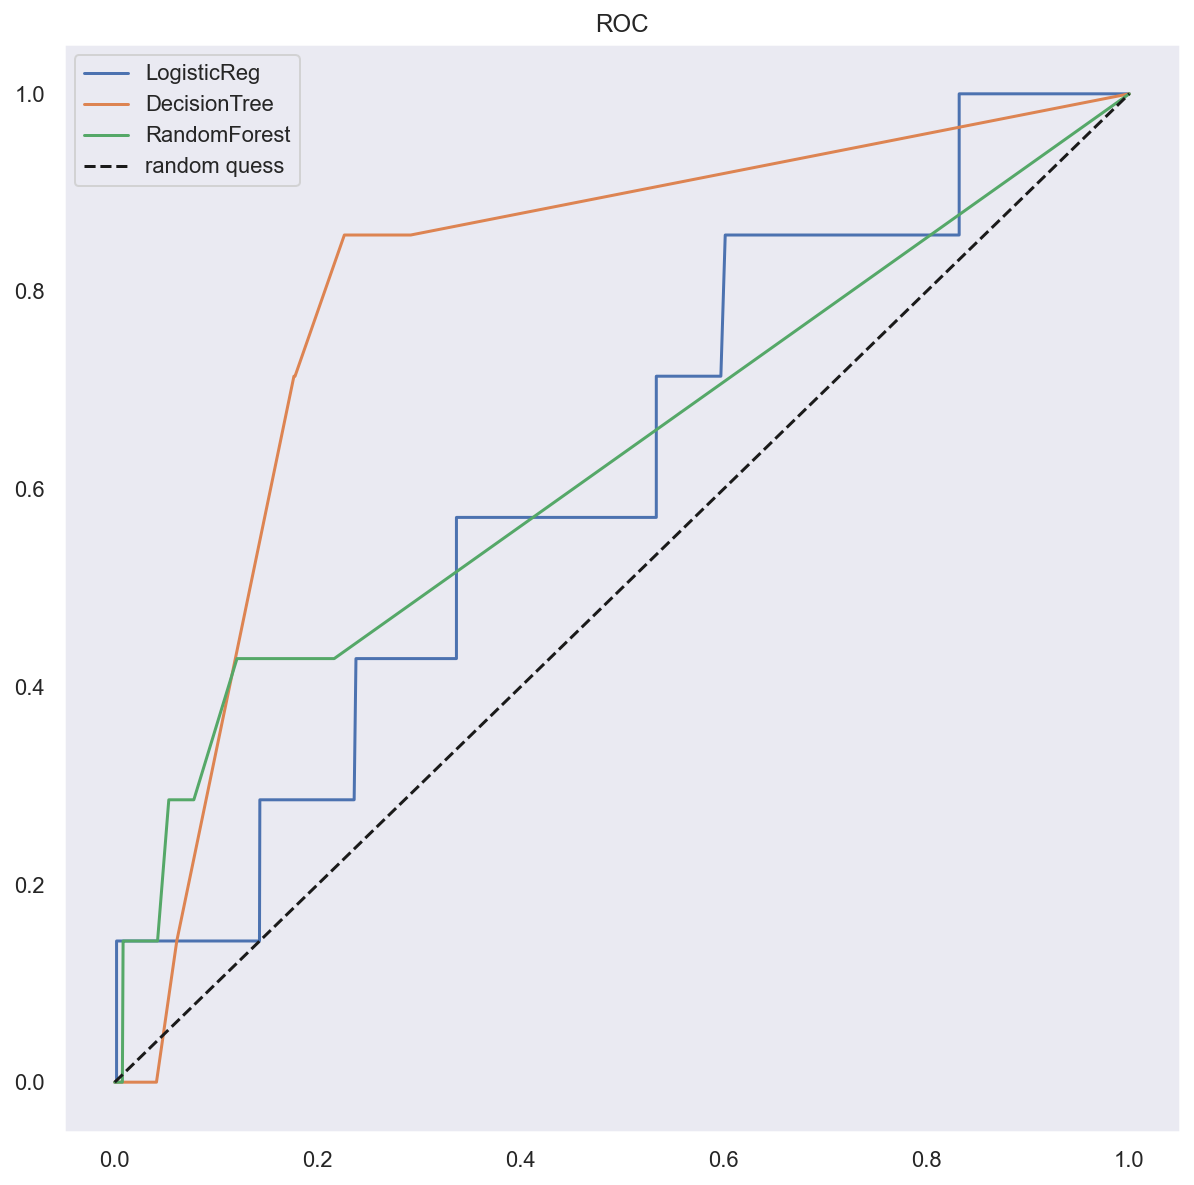

In [78]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid();
    
draw_roc_curve(models, model_names, X_test, y_test)

### 3.3.17 최종 모델 선정 - Decision Tree (SMOTE+ENN)

In [79]:
# y_test
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=6)
dt_clf.fit(X_train_mix, y_train_mix)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

------confusion matrix
[[2164  633]
 [   1    6]]
Accuracy:0.7738944365192582, precision:0.009389671361502348
recall"0.8571428571428571, F1:0.018575851393188854, AUC:0.8154144746922724


In [80]:
# y_train
dt_pred= dt_clf.predict(X_train)
print_clf_eval(y_train, dt_pred)

------confusion matrix
[[9301 1957]
 [  16   17]]
Accuracy:0.8252590558852183, precision:0.008611955420466059
recall"0.5151515151515151, F1:0.01694070752366716, AUC:0.670659786710595
